In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# The Iris Dataset

## Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris setosa, versicolor, and virginica.

**Format**

iris is a data frame with 150 cases (rows) and 5 variables (columns) named Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, and Species.

iris3 gives the same data arranged as a 3-dimensional array of size 50 by 4 by 3, as represented by S-PLUS. The first dimension gives the case number within the species subsample, the second the measurements with names Sepal L., Sepal W., Petal L., and Petal W., and the third the species.

**Source**

Fisher, R. A. (1936) The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7, Part II, 179–188.

The data were collected by Anderson, Edgar (1935). The irises of the Gaspe Peninsula, Bulletin of the American Iris Society, 59, 2–5.

**About Dataset**

This is a famous dataset and has been formatted in many forms for the ease of graphing and analysis.  To inspect the data set, check out: https://raw.githubusercontent.com/plotly/datasets/master/iris.cs

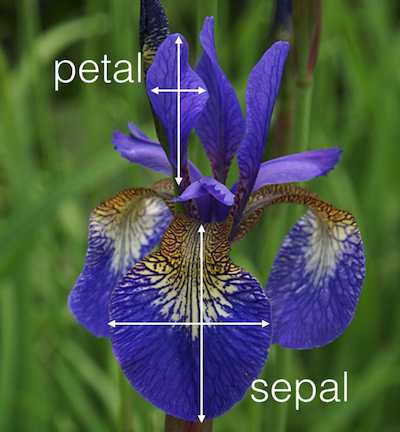

In [2]:
from IPython.display import Image
Image(filename='iris_petal_sepal.png')

# Some Exploratory Data Analysis

Exploring the data can take many forms.  It includes doing preliminary summary statistics, feature engineering or reduction.  I will mainly explore the data visually because the feature dimensions are low enough to do so.

## Matplotlib is a simple way to create 2-D graphs

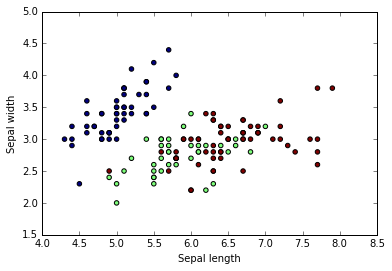

In [3]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

# Plot Sepal Length vs Sepal Width
X = iris.data[:, :2]
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Matplotlib plots of 2 of the attributes
#plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
#plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Blues)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.jet)
#plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.viridis)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

The graph above shows the 2-dimension measurement and color coded by specie of Iris.  There seems to be a clear separation from the blue-colored iris specie from the other two species.  However, the green-colored iris specie is quite co-mingled with the red-colored specie at least in the Sepal Length vs Sepal Width dimension space.

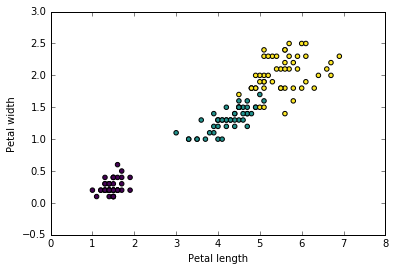

In [4]:
# Plot Petal Length vs Petal Width
X = iris.data[:, 2:4]
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Matplotlib plots of 2 of the attributes
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.viridis)

plt.xlabel('Petal length')
plt.ylabel('Petal width')

In this graph, there is a clear separation for all three species of irises that is the colored representation of the data are very clustered close to each other.

## Exploring all 4 attributes and their distribution by bar graphs

The manual plotting of 2-dimensional graphs are informative but can be labor-intensive.  If the number of predictors are relatively low, you can use a plotting process where it will choose all combinations of 2 dimensions for plotting.

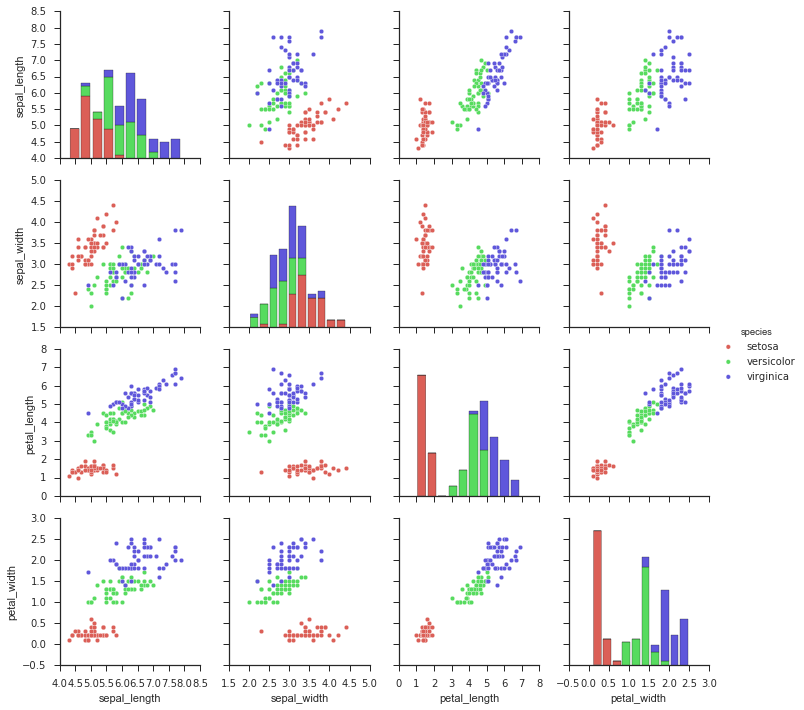

In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris_sns = sns.load_dataset("iris")

#g = sns.pairplot(iris_sns, hue="species", palette="husl")
#g = sns.pairplot(iris_sns, hue="species", palette="Paired")
g = sns.pairplot(iris_sns, hue="species", palette="hls")

## Graphs by 4 attributes and their distribution of attributes

Notice the color coding makes it easy to distinguish any patterns in the data.

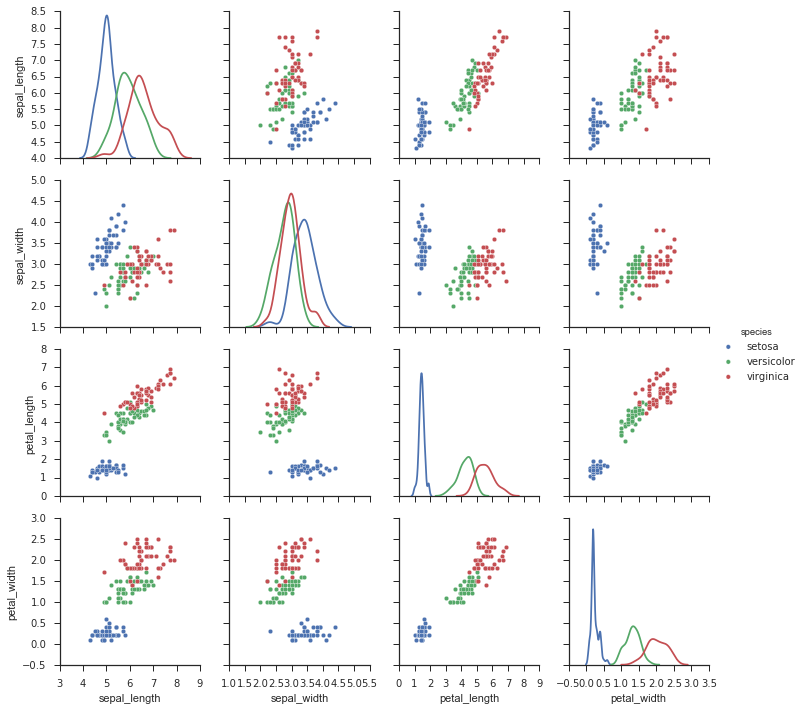

In [6]:
g = sns.pairplot(iris_sns, diag_kind="kde", hue="species")

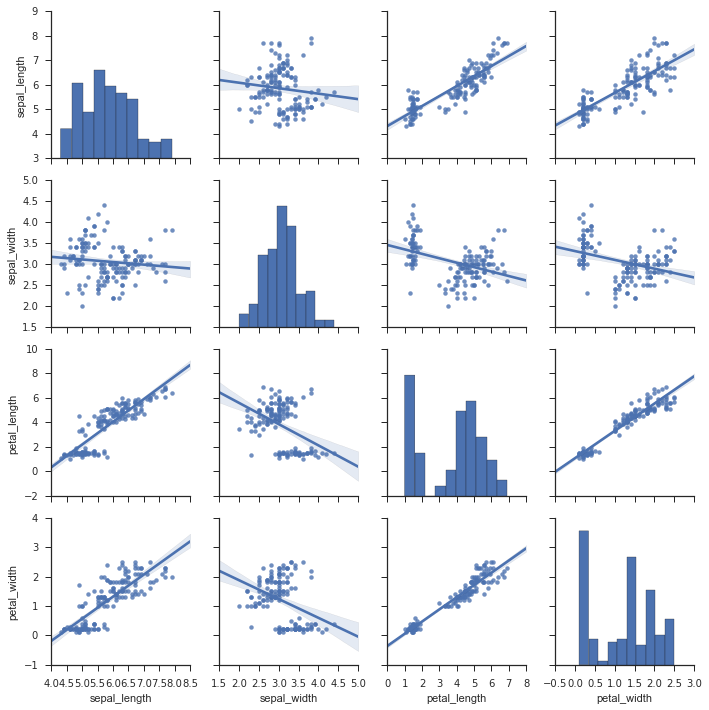

In [7]:
g = sns.pairplot(iris_sns, kind="reg")

# Logistic Regression

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# load the iris datasets
iris = datasets.load_iris()

## Using only Sepal Length and Sepal Width as features

In [9]:
# We only take the first two features
X = iris.data[:, :2]
Y = iris.target

In [10]:
X[0:5]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6]])

In [11]:
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X, Y)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [12]:
# make predictions
expected = Y
predicted = model.predict(X)

In [13]:
expected

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2])

In [15]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96        50
          1       0.81      0.42      0.55        50
          2       0.62      0.90      0.74        50

avg / total       0.79      0.77      0.75       150

[[49  1  0]
 [ 2 21 27]
 [ 1  4 45]]


The statistics above show how accurate the predictions were when compared to the true classification of the irises. 
The diagonal elements show how many classifications were correct predictions and the off-diagonal elements 
are the incorrect predictions.

## Using only Petal Length and Petal Width as features

In [16]:
# We only take the first two features
X = iris.data[:, 2:4]
Y = iris.target

In [17]:
X[0:5]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])

In [18]:
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X, Y)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [19]:
# make predictions
expected = Y
predicted = model.predict(X)

In [20]:
expected

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.90      0.70      0.79        50
          2       0.75      0.92      0.83        50

avg / total       0.88      0.87      0.87       150

[[50  0  0]
 [ 0 35 15]
 [ 0  4 46]]


# Conclusion

By carefully selecting the appropriate predictors, I was able to achieve much higher precision, recall and f1-score in the second logistic regression run.  Imagine if you had tens or hundreds of predictors to choose from, then just by reducing the predictor space you'll not only get better predictions but reduce compute time as well!